<a href="https://colab.research.google.com/github/inuinana/pytorch_practice/blob/master/mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307128
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.307396
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.303726
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.312135
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.301226
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.313828
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.302595
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.298641
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.306911
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.306046
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.294876
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.302206
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.301863
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.298087
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.301069
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.300322
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.302477
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.299276
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.299073
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.296754
Train Epoch: 1 [12800/60000

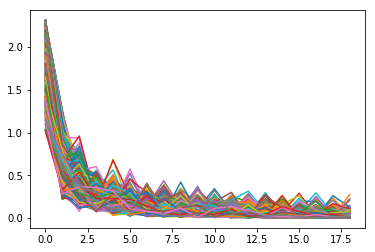

Train Epoch: False [0/60000 (0%)]	Loss: 0.001266
Train Epoch: False [640/60000 (1%)]	Loss: 0.001604
Train Epoch: False [1280/60000 (2%)]	Loss: 0.013358
Train Epoch: False [1920/60000 (3%)]	Loss: 0.009435
Train Epoch: False [2560/60000 (4%)]	Loss: 0.021677
Train Epoch: False [3200/60000 (5%)]	Loss: 0.010138
Train Epoch: False [3840/60000 (6%)]	Loss: 0.032901
Train Epoch: False [4480/60000 (7%)]	Loss: 0.037079
Train Epoch: False [5120/60000 (9%)]	Loss: 0.008239
Train Epoch: False [5760/60000 (10%)]	Loss: 0.036176
Train Epoch: False [6400/60000 (11%)]	Loss: 0.010976
Train Epoch: False [7040/60000 (12%)]	Loss: 0.000839
Train Epoch: False [7680/60000 (13%)]	Loss: 0.010736
Train Epoch: False [8320/60000 (14%)]	Loss: 0.006362
Train Epoch: False [8960/60000 (15%)]	Loss: 0.004072
Train Epoch: False [9600/60000 (16%)]	Loss: 0.014479
Train Epoch: False [10240/60000 (17%)]	Loss: 0.010770
Train Epoch: False [10880/60000 (18%)]	Loss: 0.010426
Train Epoch: False [11520/60000 (19%)]	Loss: 0.080543
Tra

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Test set: Average loss: 0.0014, Accuracy: 9738/10000 (97%)



In [2]:
# Akihiro Inui 2019 June


from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from matplotlib import pyplot as plt

# Training settings
batch_size = 64

# Load MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
       # Inherit nn.Module class
        super(Net, self).__init__()
        
        # Define network architecture
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)
        
        # Define loss function and optimizer
        # Note that this CrossEntropy function includes softmax
        self.loss_function = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.parameters(), lr=0.01, momentum=0.5)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)


    def train(self, epoch):
        loss_history_epoch = []
        for batch_idx, (data, target) in enumerate(train_loader):
            # Split dataset into data and target label
            data, target = Variable(data), Variable(target)
            
            
            # Make prediction
            output = self(data)
            
            # Calcluate loss
            loss = self.loss_function(output, target)
            loss_history_epoch.append(loss)
            
             # Zero gradients, perform a backward pass, and update the weights.
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            # Print training status
            if batch_idx % 10 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data))
        return loss_history_epoch

                
    def test(self):
        self.eval()
        test_loss = 0
        correct = 0
        for data, target in test_loader:
            # Split test dataset into data and label
            data, target = Variable(data, volatile=True), Variable(target)
            # Make predictions
            output = self(data)
            
            # sum up batch loss
            test_loss += self.loss_function(output, target).data
            
            # get the index of the max (predicted class)
            pred = output.data.max(1, keepdim=True)[1]
            
            # Count correct predictions
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))


# main
if __name__ == "__main__":
  # Initialize model
  model = Net()
    
  # Training
  loss_history = []
  for epoch in range(1, 20):
    print(int(epoch))
    loss_history_epoch = model.train(epoch)
    loss_history.append(loss_history_epoch)
  plt.plot(loss_history)
  plt.show()  
    
  # Test
  model.test()
  